In [1]:
# !pip install ipyfilechooser

# show the used python env
import sys
sys.executable

'C:\\Users\\sebrh\\miniconda3\\envs\\stardist\\python.exe'

In [2]:
# import the required libraries
#from aicspylibczi import CziFile
#from czitools import czi_metadata as czimd_aics
from tools import pylibczirw_metadata as czimd
from tools import pylibczirw_tools as czird
from tools import misc, napari_tools
from ipyfilechooser import FileChooser
from IPython.display import display, HTML
import napari

In [3]:
defaultdir = r"testdata"
fc = FileChooser(defaultdir)
fc.filter_pattern = '*.czi'
display(fc)

FileChooser(path='E:\Github\i2k_2022_zeiss\workshop\testdata', filename='', title='', show_hidden=False, selec…

In [4]:
# Print the selected path, filename, or both
print(fc.selected_path)
print(fc.selected_filename)
print(fc.selected)

E:\Github\i2k_2022_zeiss\workshop\testdata
DAPI_PGC_10x_S02sm.czi
E:\Github\i2k_2022_zeiss\workshop\testdata\DAPI_PGC_10x_S02sm.czi


In [4]:
# get only specific metadata
czi_dimensions = czimd.CziDimensions(fc.selected)
print("SizeS: ", czi_dimensions.SizeS)
print("SizeT: ", czi_dimensions.SizeT)
print("SizeZ: ", czi_dimensions.SizeZ)
print("SizeC: ", czi_dimensions.SizeC)
print("SizeY: ", czi_dimensions.SizeY)
print("SizeX: ", czi_dimensions.SizeX)

SizeS:  1
SizeT:  None
SizeZ:  None
SizeC:  2
SizeY:  1493
SizeX:  1765


In [5]:
# and get more info
czi_scaling = czimd.CziScaling(fc.selected)
czi_channels = czimd.CziChannelInfo(fc.selected)
czi_bbox = czimd.CziBoundingBox(fc.selected)
czi_info = czimd.CziInfo(fc.selected)
czi_objectives = czimd.CziObjectives(fc.selected)
czi_detectors = czimd.CziDetector(fc.selected)
czi_microscope = czimd.CziMicroscope(fc.selected)
czi_sample = czimd.CziSampleInfo(fc.selected)

unsupported operand type(s) for /: 'NoneType' and 'float' Using defaults = 1.0
No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
Trying to extract Scene and Well information if existing ...


In [16]:
# get the complete metadata at once as one big class
mdata_complete = czimd.CziMetadataComplete(fc.selected)

# get the CZI metadata dictionary directly from filename
mdict_complete = czimd.get_czimetadata_dict_complete(fc.selected, sort=True)

# get selected metadata as a dictionary
mdata = czimd.CziMetadata(fc.selected)

# get selected metadata as a dictionary
mdict_red = czimd.create_mdict_red(mdata, sort=True)

# convert metadata dictionary to a pandas dataframe
mdframe = misc.md2dataframe(mdict_red)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(mdframe.to_html()))

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
Trying to extract Scene and Well information if existing ...


In [13]:
# write XML to disk
xmlfile = czimd.writexml(fc.selected)
print("XML File written to:", xmlfile)

XML File written to: E:\Github\i2k_2022_zeiss\workshop\testdata\DAPI_PGC_10x_S02sm_CZI_MetaData.xml


In [14]:
# get the planetable for the CZI file
pt, csvfile = misc.get_planetable(fc.selected,
                                  norm_time=True,
                                  savetable=True,
                                  separator=',',
                                  index=True)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(pt.to_html()))
print("PlaneTable CSV File written to:", xmlfile)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
Trying to extract Scene and Well information if existing ...


  0%|          | 0/2 [00:00<?, ?it/s]e:\Github\i2k_2022_zeiss\workshop\tools\misc.py:372: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_czi = df_czi.append({'Subblock': sbcount,
 50%|█████     | 1/2 [00:00<00:00,  4.17it/s]e:\Github\i2k_2022_zeiss\workshop\tools\misc.py:372: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_czi = df_czi.append({'Subblock': sbcount,
100%|██████████| 2/2 [00:00<00:00,  6.68it/s]


PlaneTable CSV File written to: E:\Github\i2k_2022_zeiss\workshop\testdata\DAPI_PGC_10x_S02sm_CZI_MetaData.xml


In [15]:
# return array with dimension order STZCYXA
mdarray, dimstring = czird.read_mdarray(fc.selected)

# remove A dimension do display the array inside Napari
dim_order, dim_index, dim_valid = czimd.CziMetadata.get_dimorder(dimstring)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
Trying to extract Scene and Well information if existing ...


100%|██████████| 2/2 [00:00<00:00, 102.82it/s]


In [17]:
# show array inside napari viewer
viewer = napari.Viewer()
layers = napari_tools.show(viewer, mdarray, mdata,
                           dim_order=dim_order,
                           blending="additive",
                           contrast='napari_auto',
                           gamma=0.85,
                           add_mdtable=True,
                           name_sliders=True)

C:\Users\sebrh\miniconda3\envs\stardist\lib\site-packages\napari\_qt\__init__.py:50: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)


Adding Channel  : DAPI
Shape Channel   : 0 (1, 1, 1, 1, 1493, 1765)
Scaling Factors : [1.0, 1.0, 2.198, 1.0, 1.0, 1.0]
Adding Channel  : PGC
Shape Channel   : 1 (1, 1, 1, 1, 1493, 1765)
Scaling Factors : [1.0, 1.0, 2.198, 1.0, 1.0, 1.0]
Rename Sliders based on the Dimension String ....


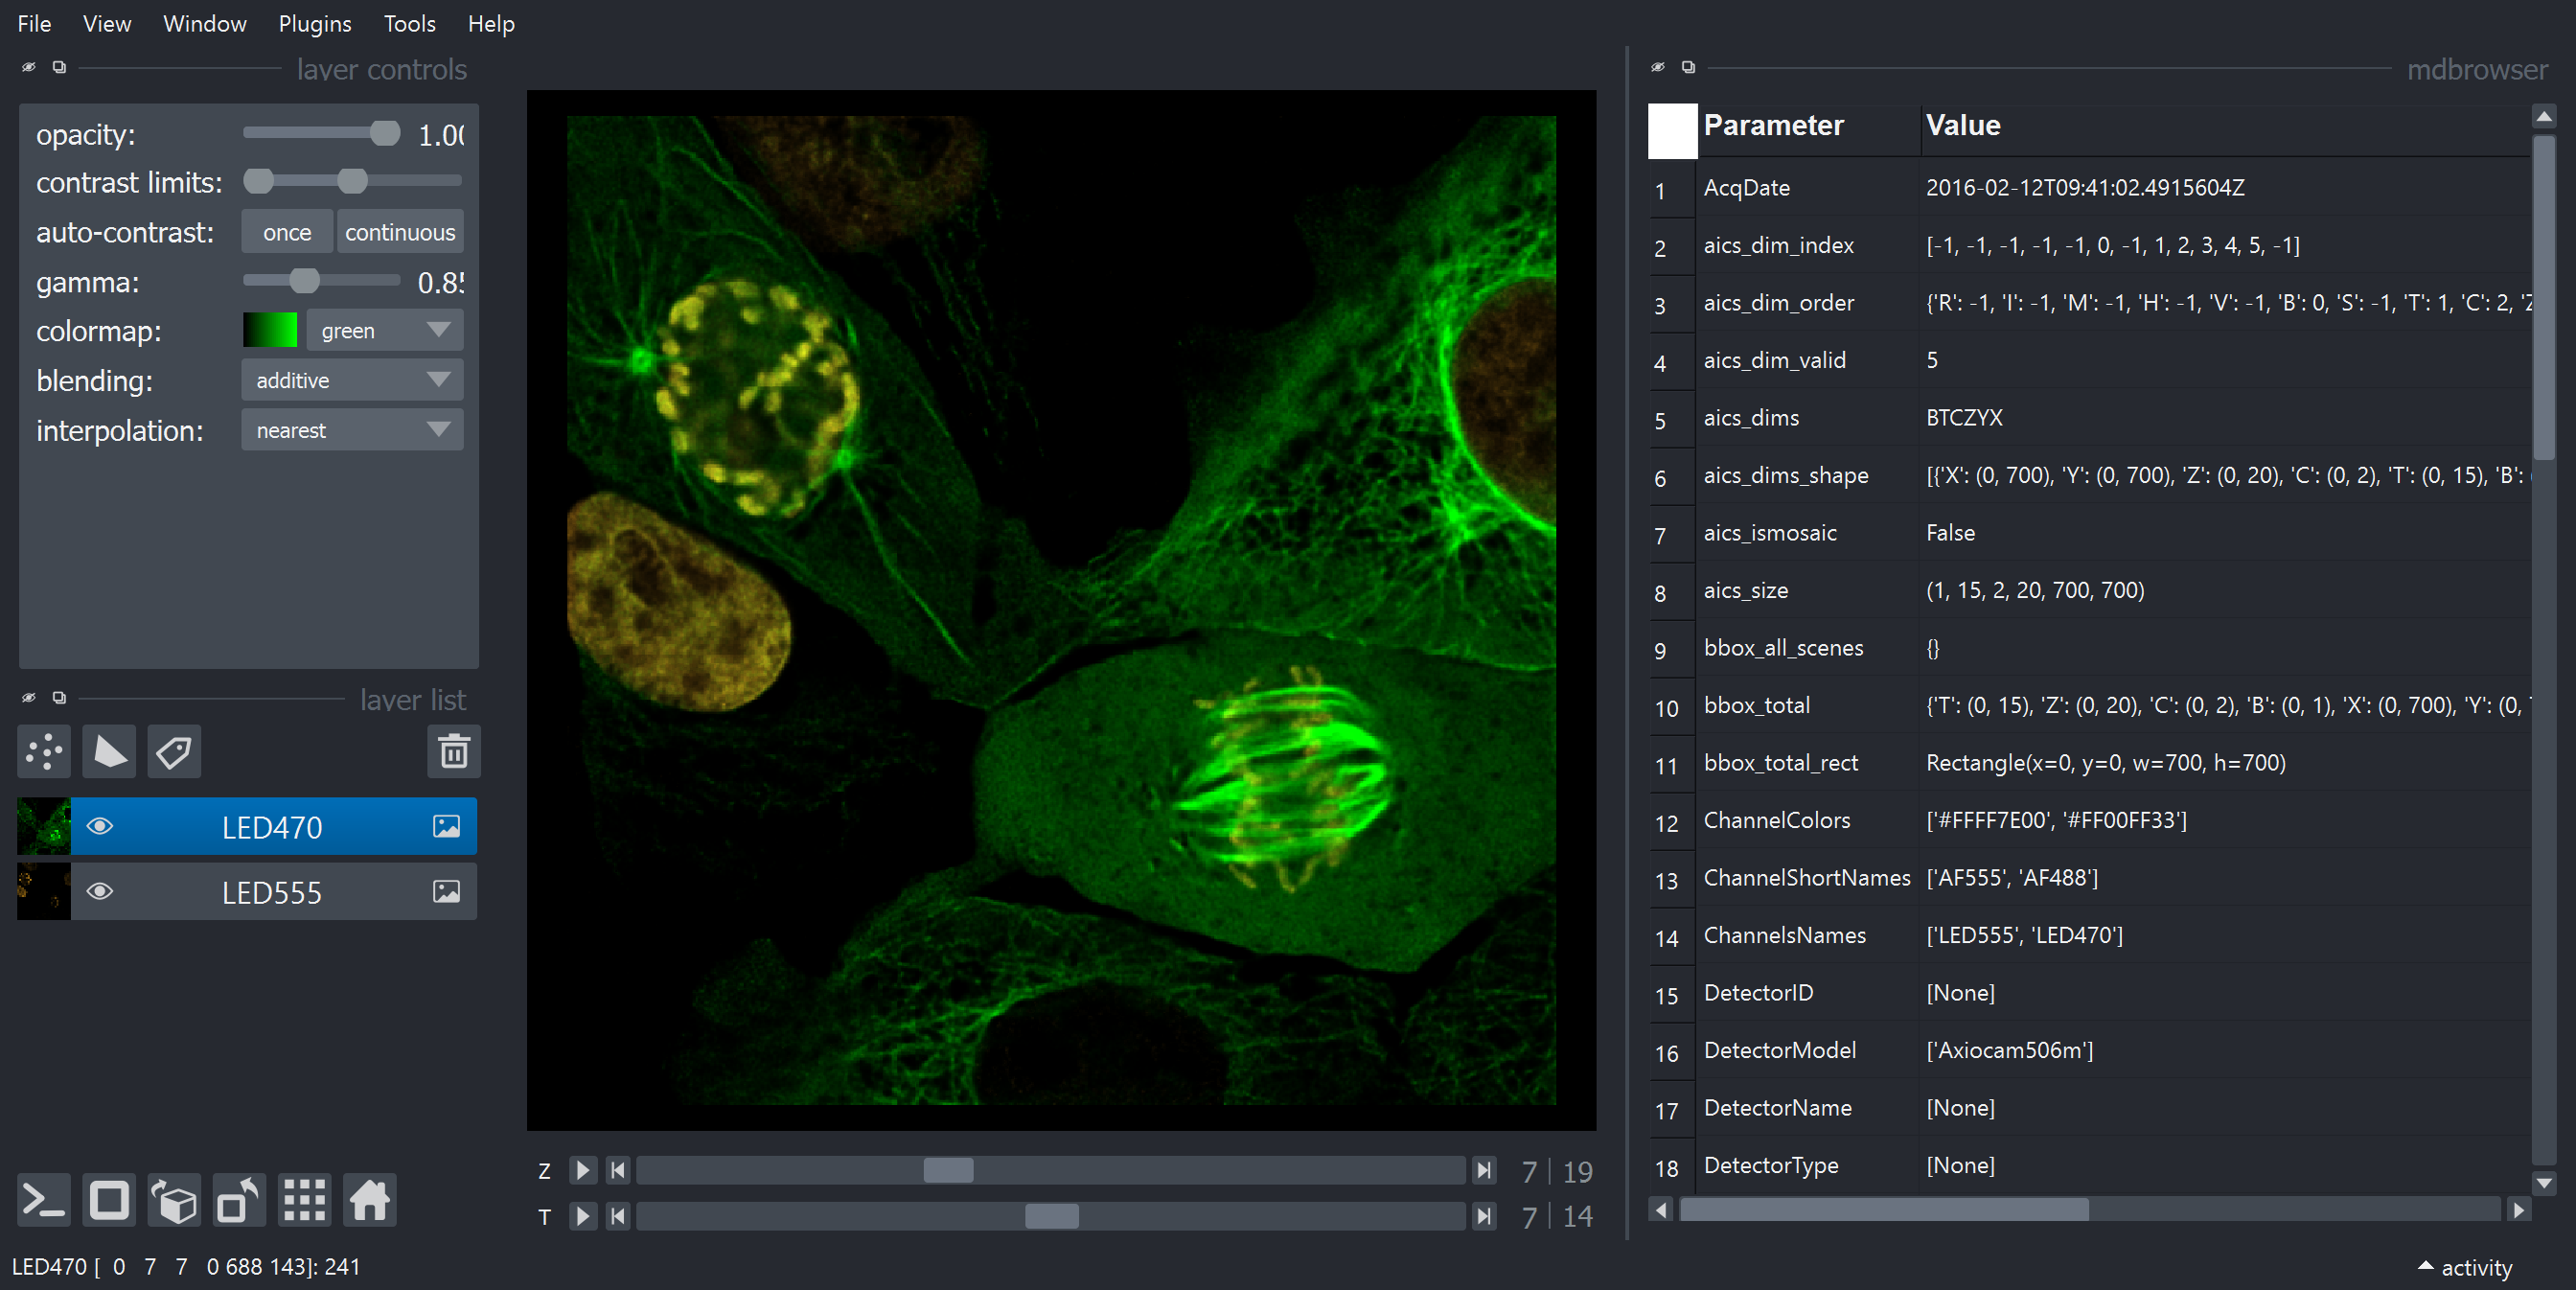

In [14]:
napari.utils.nbscreenshot(viewer)